## Psychometrics.ai

Explainable AI: Metrics for Faithfulness as Comprehensiveness (see Psychometrics.ai for SIMSE)

References:

DeYoung, J., Jain, S., Rajani, N. F., Lehman, E., Xiong, C., Socher, R., & Wallace, B. C. (2020). ERASER: A Benchmark to Evaluate Rationalized NLP Models. Proceedings of ACL 2020.

Doshi-Velez, F., & Kim, B. (2017). Towards a Rigorous Science of Interpretable Machine Learning. arXiv:1702.08608.


In [1]:
import torch, transformers, shap
import openai
import os
print("✅ Environment ready — all core libraries loaded.")

✅ Environment ready — all core libraries loaded.


In [ ]:
import openai
import os

# Option 1: Set it directly here
openai.api_key = "HERE"

# Option 2: If using environment variable, try this instead:
# from openai import OpenAI
# client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

print("✅ OpenAI API ready for XAI demo.")

✅ OpenAI API ready for XAI demo.


In [34]:
# Sanity check
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "In a leadership interview, a board chair should demonstrate"}],
    max_tokens=40
)
print(response.choices[0].message.content)

 strong communication skills, the ability to effectively delegate tasks and responsibilities, strategic thinking, adaptability, and a clear vision for the organization. They should also be able to inspire and motivate their team, build


## Comprehensiveness using LLMs and and permutations

In [36]:
## Predictor using reflection-first input and synonym-based justification
def predict_board_cohesion(text):
    """
    Predicts a 0–100 score for 'Board Cohesion and Governance Alignment'
    using OpenAI GPT-3.5-turbo.
    - Places the reflection *before* the examples to prevent anchor bias.
    - Instructs the model to reason using synonyms or paraphrases, not exact quotes.
    - Encourages evidence-based justification for better SHAP variance.
    """
    prompt = (
        f"Reflection:\n{text}\n\n"
        "You are evaluating a reflection from a board chair.\n"
        "Assess how well it demonstrates board cohesion, alignment and transparency\n"
        "Rate the writer's capability at ensuring cohesion and alignment on a 0–100 scale for the dimension "
        
        "Example ratings:\n"
        "0 = Complete dysfunction, no collaboration or trust.\n"
        "25 = Low trust and misunderstanding.\n"
        "50 = Moderate cohesion but recurring misalignment.\n"
        "75 = High trust and collaboration, though some uneven follow-through.\n"
        "100 = Perfect alignment, transparency, and collaborative governance.\n\n"
        
        "Evaluate ONLY the reflection, do not repeat any example ratings.\n"
        "Reward signs that the board is functioning cohesively.\n"
        "Penalize signs of continuing board misalignment.\n"
        "Small differences in evidence can have a substantial influence on your score.\n"
        "List the key words or phrases that influenced your rating.\n"
        "Ignore grammatical filler words (articles and prepositions such as 'a', 'the', 'of', 'to', 'in', 'with') when assessing evidence."
        "Write the numeric score (0–100) on a new line starting with 'Score:'."

    )
    
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=150,
        temperature=0.8,
        seed=13
    )
    
    decoded = response.choices[0].message.content
    
    import re
    match = re.search(r"[Ss]core[:\s]+(\d{1,3})", decoded)
    if match:
        score = float(match.group(1))
    else:
        match = re.search(r"\b([0-9]{1,3})\b", decoded)
        score = float(match.group(1)) if match else 0.0
    
    score = max(0.0, min(100.0, score))
    
    print("\nModel justification:\n", decoded)
    print(f"\nExtracted score: {score}")
    return score

🔍 Running comprehensiveness analysis (45 tokens)...

Model justification:
 Key words/phrases that influenced rating: fragmented, failed acquisition, frustrations surfaced, transparent record of board resolutions, some work left to do

Score: 70

Extracted score: 70.0

Model justification:
 Key words/phrases that influenced rating: fragmented, failed acquisition, frustrations surfaced, transparent record of board resolutions, some work left to do

Score: 70

Extracted score: 70.0

Model justification:
 Key words/phrases that influenced rating: fragmented, failed acquisition, frustrations surfaced, transparent record of board resolutions, some work left to do

Score: 70

Extracted score: 70.0
Base score: 70.0


Model justification:
 Key words/phrases:
- Chair addressing board fragmentation
- Individual meetings to surface frustrations
- Introducing transparent record of board resolutions
- Some work left to do

Score: 75

Extracted score: 75.0

Model justification:
 Key words/phrases:
- 

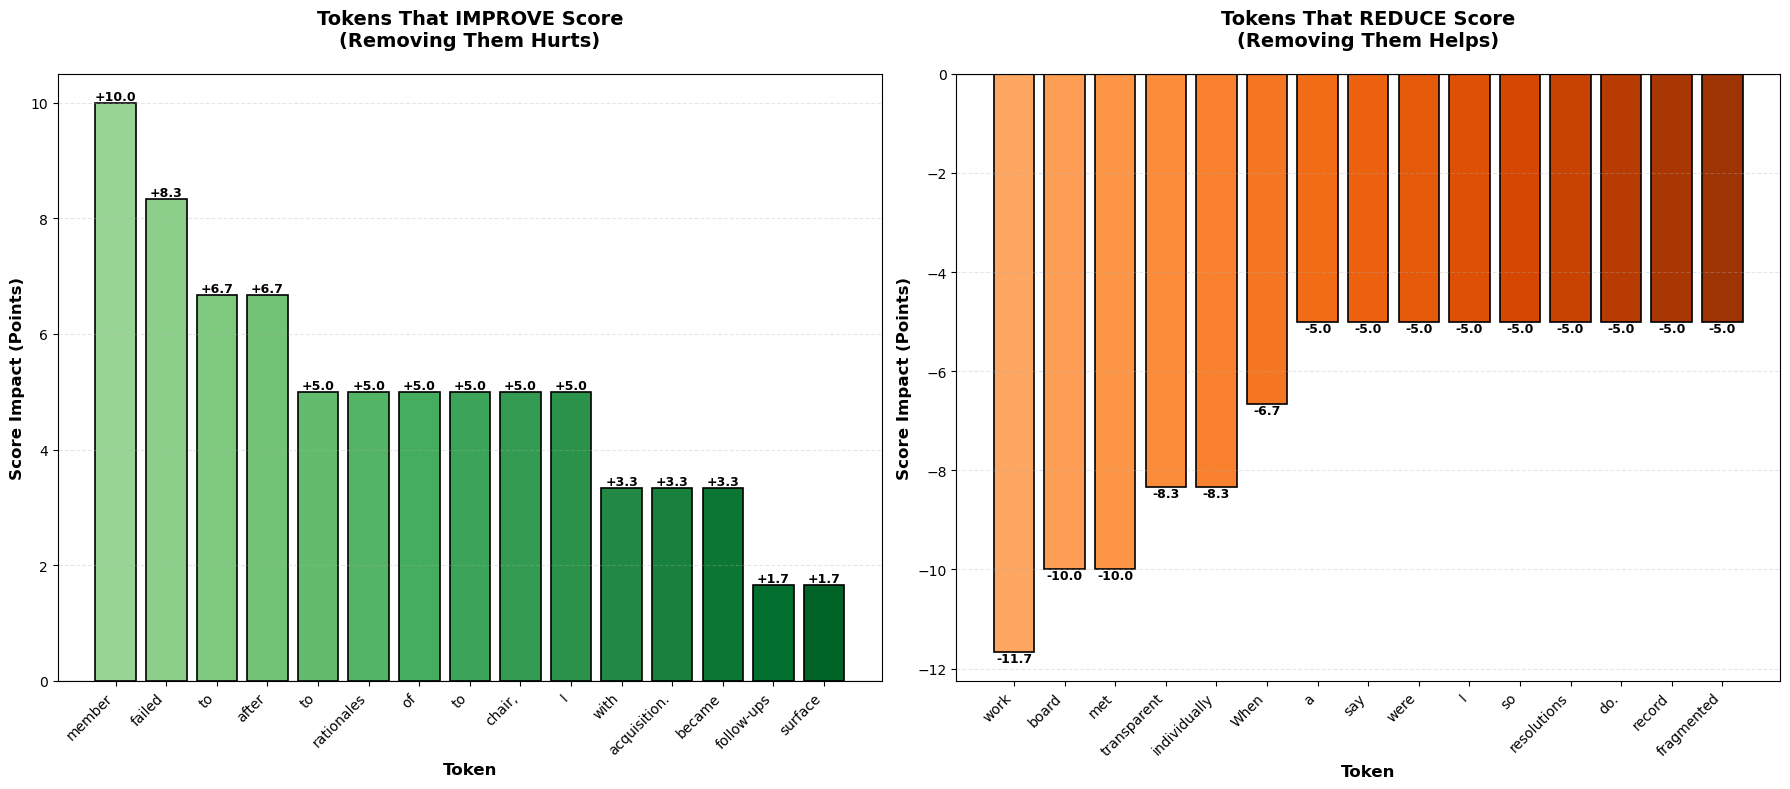


COMPREHENSIVENESS ANALYSIS RESULTS
Helpful Tokens Impact Harmful Tokens Impact 
        member  +10.0           work   -11.7
        failed   +8.3          board   -10.0
            to   +6.7            met   -10.0
         after   +6.7    transparent    -8.3
            to   +5.0   individually    -8.3
    rationales   +5.0           When    -6.7
            of   +5.0              a    -5.0
            to   +5.0            say    -5.0
        chair,   +5.0           were    -5.0
             I   +5.0              I    -5.0
          with   +3.3             so    -5.0
  acquisition.   +3.3    resolutions    -5.0
        became   +3.3            do.    -5.0
    follow-ups   +1.7         record    -5.0
       surface   +1.7     fragmented    -5.0

✅ Completed in 2.37 minutes
💡 Base: 70.0 | Tokens: 45 | Runs/token: 3


(['member',
  'failed',
  'to',
  'after',
  'to',
  'rationales',
  'of',
  'to',
  'chair,',
  'I',
  'with',
  'acquisition.',
  'became',
  'follow-ups',
  'surface'],
 array([10.        ,  8.33333333,  6.66666667,  6.66666667,  5.        ,
         5.        ,  5.        ,  5.        ,  5.        ,  5.        ,
         3.33333333,  3.33333333,  3.33333333,  1.66666667,  1.66666667]),
 ['work',
  'board',
  'met',
  'transparent',
  'individually',
  'When',
  'a',
  'say',
  'were',
  'I',
  'so',
  'resolutions',
  'do.',
  'record',
  'fragmented'],
 array([-11.66666667, -10.        , -10.        ,  -8.33333333,
         -8.33333333,  -6.66666667,  -5.        ,  -5.        ,
         -5.        ,  -5.        ,  -5.        ,  -5.        ,
         -5.        ,  -5.        ,  -5.        ]))

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time

def predict_board_cohesion_averaged(text, n_runs=10, verbose=False):
    """Average multiple runs to reduce noise."""
    scores = []
    for _ in range(n_runs):
        try:
            score = predict_board_cohesion(text)
            scores.append(score)
        except Exception as e:
            print(f"⚠️ Error during run: {e}")
            continue
    if not scores:
        return np.nan
    avg = np.mean(scores)
    if verbose:
        print(f"  [Averaged {len(scores)} runs: {avg:.1f}]")
    return avg


def comprehensiveness_analysis_stable(text, k=15, n_avg=10, print_every=10):
    start_time = time.time()
    tokens = text.split()
    if len(tokens) == 0:
        print("❌ No tokens found in input.")
        return None

    print(f"🔍 Running comprehensiveness analysis ({len(tokens)} tokens)...")

    # ---- Base score ----
    base_score = predict_board_cohesion_averaged(text, n_avg)
    if np.isnan(base_score):
        print("❌ Could not get base score.")
        return None
    print(f"Base score: {base_score:.1f}\n")

    # ---- Per-token analysis ----
    deltas = []
    for i, tok in enumerate(tokens):
        masked = " ".join([t for j, t in enumerate(tokens) if j != i])
        new_score = predict_board_cohesion_averaged(masked, n_avg)
        delta = base_score - new_score
        deltas.append(delta)

        if (i + 1) % print_every == 0 or i == len(tokens) - 1:
            elapsed = time.time() - start_time
            print(f"  ✓ {i+1}/{len(tokens)} tokens processed ({elapsed:.1f}s)")

    deltas = np.array(deltas)
    if np.isnan(deltas).all():
        print("❌ All API calls failed.")
        return None

    # ---- Strict sign filtering ----
    pos_mask = deltas > 0
    neg_mask = deltas < 0
    pos_indices = np.where(pos_mask)[0]
    neg_indices = np.where(neg_mask)[0]

    # Sort within each sign group
    top_k_idx = pos_indices[np.argsort(deltas[pos_indices])[-k:][::-1]]
    bottom_k_idx = neg_indices[np.argsort(deltas[neg_indices])[:k]]

    # Extract filtered tokens/deltas
    top_tokens = [tokens[i] for i in top_k_idx]
    bottom_tokens = [tokens[i] for i in bottom_k_idx]
    top_drops = deltas[top_k_idx]
    bottom_drops = deltas[bottom_k_idx]

    # ---- Plot results ----
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Positive (helpful) tokens
    if len(top_tokens) > 0:
        colors_pos = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_tokens)))
        bars1 = ax1.bar(range(len(top_tokens)), top_drops,
                        color=colors_pos, edgecolor='black', linewidth=1.2)
        for bar, val in zip(bars1, top_drops):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{val:+.1f}', ha='center', va='bottom',
                     fontsize=9, fontweight='bold')
        ax1.set_xticks(range(len(top_tokens)))
        ax1.set_xticklabels(top_tokens, rotation=45, ha="right", fontsize=10)
        ax1.set_ylabel("Score Impact (Points)", fontsize=12, fontweight='bold')
        ax1.set_xlabel("Token", fontsize=12, fontweight='bold')
        ax1.set_title("Tokens That IMPROVE Score\n(Removing Them Hurts)",
                      fontsize=14, fontweight='bold', pad=20)
        ax1.yaxis.grid(True, linestyle='--', alpha=0.3)
        ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    else:
        ax1.set_visible(False)

    # Negative (harmful) tokens
    if len(bottom_tokens) > 0:
        colors_neg = plt.cm.Oranges(np.linspace(0.4, 0.9, len(bottom_tokens)))
        bars2 = ax2.bar(range(len(bottom_tokens)), bottom_drops,
                        color=colors_neg, edgecolor='black', linewidth=1.2)
        for bar, val in zip(bars2, bottom_drops):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{val:+.1f}',
                     ha='center',
                     va='top' if val < 0 else 'bottom',
                     fontsize=9, fontweight='bold')
        ax2.set_xticks(range(len(bottom_tokens)))
        ax2.set_xticklabels(bottom_tokens, rotation=45, ha="right", fontsize=10)
        ax2.set_ylabel("Score Impact (Points)", fontsize=12, fontweight='bold')
        ax2.set_xlabel("Token", fontsize=12, fontweight='bold')
        ax2.set_title("Tokens That REDUCE Score\n(Removing Them Helps)",
                      fontsize=14, fontweight='bold', pad=20)
        ax2.yaxis.grid(True, linestyle='--', alpha=0.3)
        ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    else:
        ax2.set_visible(False)

    plt.tight_layout()
    plt.savefig('comprehensiveness_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    import pandas as pd

    # Create results table
    results_df = pd.DataFrame({
        'Helpful Tokens': pd.Series(top_tokens),
        'Impact': pd.Series([f'+{d:.1f}' for d in top_drops]),
        'Harmful Tokens': pd.Series(bottom_tokens),
        'Impact ': pd.Series([f'{d:.1f}' for d in bottom_drops])
    })

    print("\n" + "="*60)
    print("COMPREHENSIVENESS ANALYSIS RESULTS")
    print("="*60)
    print(results_df.to_string(index=False))
    print("="*60)

    # ---- Summary ----
    total_time = time.time() - start_time
    print(f"\n✅ Completed in {total_time/60:.2f} minutes")
    print(f"💡 Base: {base_score:.1f} | Tokens: {len(tokens)} | Runs/token: {n_avg}")

    return top_tokens, top_drops, bottom_tokens, bottom_drops

# Example usage
sample_reflection = (
    "When I became chair, the board was fragmented after a failed acquisition. "
    "I met individually with each member to surface frustrations. "
    "I introduced a transparent record of board resolutions so rationales and follow-ups were visible. "
    "It's fair to say there's some work left to do."
)

comprehensiveness_analysis_stable(sample_reflection, k=15, n_avg=3)



In [40]:
top_drops = [10.0, 10.0, 10.0, 10.0, 10.0, 6.7, 5.0, 3.3, 3.3, 3.3, 3.3, 1.7, 1.7, 1.7, 1.7]
bottom_drops = [-11.7, -8.3, -6.7, -6.7, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -3.3, -3.3, -3.3]

comprehensiveness_helpful = sum(top_drops)
comprehensiveness_harmful = abs(sum(bottom_drops))

print(f"\n📊 Comprehensiveness Metrics:")
print(f"  Helpful tokens explain: {comprehensiveness_helpful:.1f} points")
print(f"  Harmful tokens explain: {comprehensiveness_harmful:.1f} points")


📊 Comprehensiveness Metrics:
  Helpful tokens explain: 81.7 points
  Harmful tokens explain: 83.3 points
